In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [122]:
df = pd.read_excel('clean_weather_data1.xlsx')
df.head()

,day,tempMin,tempMax,summary,desc,cloudCover,humidity,windSpeed,visibility
0,2015-01-01,7.53,12.23,Possible light rain until evening.,rain,0.80,0.89,14.69,4.43
1,2015-01-02,3.58,7.15,Possible light rain throughout the day.,rain,0.62,0.79,15.04,5.64
2,2015-01-03,-0.61,6.54,Clear throughout the day.,rain,0.31,0.84,4.48,6.20
3,2015-01-04,-0.63,7.59,Mostly cloudy throughout the day.,partly-cloudy-day,0.78,0.85,4.35,6.22
4,2015-01-05,6.51,10.43,Overcast throughout the day.,partly-cloudy-day,0.85,0.91,6.20,5.91


In [123]:
df.isnull().sum()

day           0
tempMin       0
tempMax       0
summary       0
desc          0
cloudCover    0
humidity      0
windSpeed     0
visibility    0
dtype: int64

In [124]:
df = df.drop(['day','summary'], axis=1)

In [125]:
df.describe()

,tempMin,tempMax,cloudCover,humidity,windSpeed,visibility
count,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000
mean,5.724798,12.539280,0.594109,0.819323,6.696375,5.759379
std,4.711584,5.167534,0.226070,0.074883,3.761637,0.827483
min,-8.670000,-1.390000,0.000000,0.500000,0.140000,0.190000
25%,2.270000,8.715000,0.450000,0.775000,3.920000,5.530000
50%,5.780000,12.370000,0.630000,0.830000,5.860000,6.010000
75%,9.380000,16.485000,0.760000,0.870000,8.665000,6.210000
max,18.030000,30.220000,0.990000,1.000000,23.670000,10.000000


In [126]:
df.desc = df.desc.replace(['clear-day', 'cloudy', 'fog', 'partly-cloudy-day', 'rain'], [0,1,2,3,4])
x = df.drop(['desc'], axis=1)
y = df.desc

In [127]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.5, random_state=0)

In [128]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [129]:
LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [130]:
x_test = StandardScaler().fit_transform(x_test)

In [131]:
y_pred = model.predict(x_test)

In [132]:
model.score(x_train, y_train)

0.6049689440993788

In [133]:
model.score(x_test, y_test)

0.46774193548387094

In [134]:
confusion_matrix(y_test, y_pred)

array([[104,   0,   0,   0,   0],
       [  0,  20,   6,   1,   7],
       [  0,   0,   0,   0,   0],
       [128,  40,  44,  27,  39],
       [ 44,  53,  50,  17, 226]], dtype=int64)

##### cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(5):
    for j in range(5):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

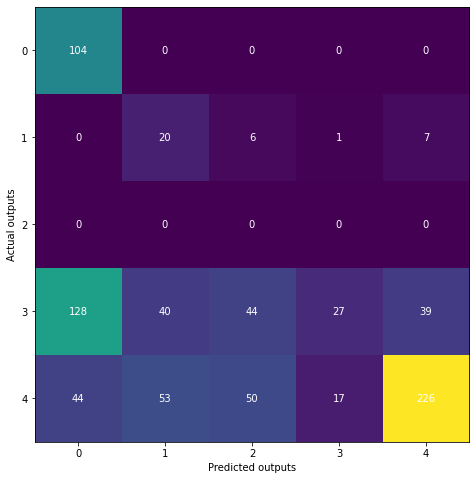

In [135]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(5))
ax.yaxis.set(ticks=range(5))
ax.set_ylim(4.5, -0.5)
for i in range(5):
    for j in range(5):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()